In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [12]:
num_frames = 100
timestep = 0.05
r_vals = np.linspace(0.0, 10.0, 500)
r_vals[0] = 1e-10
M_vals = np.linspace(0, 25.0, len(r_vals))
M_vals[0] = 1e-10
print(f"shape of r_vals : {r_vals.shape}")
print(f"shape of M_vals : {M_vals.shape}")

shape of r_vals : (500,)
shape of M_vals : (500,)


In [13]:
alpha = 0.5
Difcon = 2
t_vals = np.linspace(0, 5, 100)

P_m_vals = Difcon * np.power(t_vals, alpha)

print(P_m_vals.shape)

print(P_m_vals)

P_m_vals /= 0.05

print(P_m_vals.shape)

print(P_m_vals)

(100,)
[0.         0.44946657 0.63564173 0.77849894 0.89893315 1.00503782
 1.10096377 1.18917678 1.27128345 1.34839972 1.42133811 1.49071198
 1.55699789 1.62057478 1.68174993 1.74077656 1.7978663  1.85319816
 1.90692518 1.95917938 2.01007563 2.0597146  2.10818511 2.15556597
 2.20192753 2.24733287 2.29183884 2.33549683 2.37835356 2.42045158
 2.46182982 2.50252398 2.5425669  2.5819889  2.62081798 2.65908012
 2.69679945 2.73399844 2.77069805 2.80691786 2.84267622 2.87799032
 2.91287633 2.94734943 2.98142397 3.01511345 3.04843063 3.08138759
 3.11399578 3.14626602 3.17820863 3.20983338 3.24114957 3.27216606
 3.3028913  3.33333333 3.36349986 3.39339823 3.42303545 3.45241827
 3.48155312 3.51044617 3.53910335 3.56753034 3.5957326  3.62371538
 3.65148372 3.67904248 3.70639633 3.73354978 3.76050717 3.78727268
 3.81385036 3.8402441  3.86645767 3.89249472 3.91835876 3.94405319
 3.96958131 3.9949463  4.02015126 4.04519917 4.07009294 4.09483538
 4.1194292  4.14387707 4.16818154 4.19234512 4.21637021

In [14]:
P = np.zeros((t_vals.shape[0], M_vals.shape[0]))
print(P.shape)

(100, 500)


In [15]:
for i in range(len(t_vals)):
    # make P[P_m_vals[i]] = 1 or the closest value to 1
    P[i][int(P_m_vals[i])] = 1
    

In [16]:
print(P)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


 $G^k_s(r) = \int P^k(M)e^{\frac{-r^2}{M}}dM$

In [17]:
# get G using  $G^k_s(r) = \int P^k(M)e^{\frac{-r^2}{M}}dM$

G_pred = np.zeros((num_frames, r_vals.shape[0]))
print(G_pred.shape)

# calculate the integral using trapz
e_pow_r2_into_m = np.exp(np.outer(-r_vals*r_vals, 1/M_vals)) * (1/(M_vals*np.pi))
for i in range(num_frames):
    G_pred[i] = np.trapz(P[i] * e_pow_r2_into_m, M_vals)
    

(100, 500)


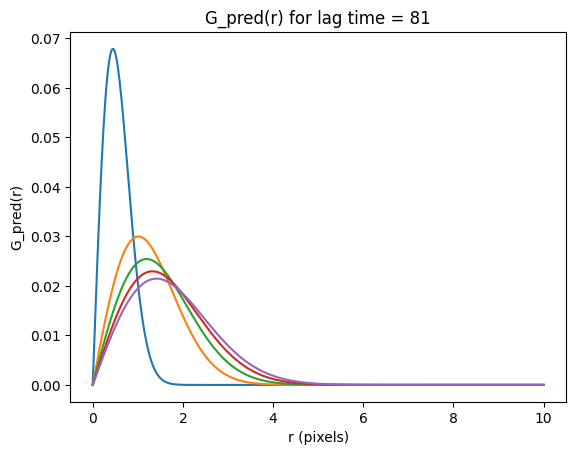

In [18]:
# plot G_pred
for i in range(1, num_frames, 20):
    plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    # plt.plot(r_vals[:-1], G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()

In [19]:
# save G_pred
np.savetxt("G_pred_test.txt", G_pred)

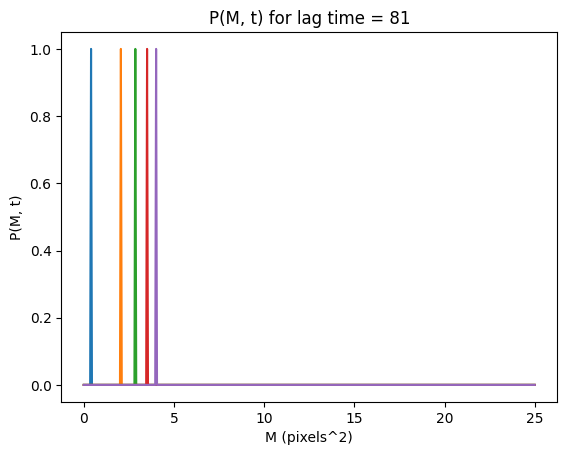

In [20]:
# plot P
for i in range(1, num_frames, 20):
    plt.plot(M_vals, P[i, :])
    plt.xlabel("M (pixels^2)")
    plt.ylabel("P(M, t)")
    plt.title(f"P(M, t) for lag time = {i}")
    # plt.show()
plt.show()